In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df_train = pd.read_csv('train.csv')
df_store = pd.read_csv('store.csv')

#1.
print('Maximum sale recorded in : ')
maxSaleIndex = df_train['Sales'].idxmax()

print('Store id: ' , df_train.iloc[maxSaleIndex]['Store'] , ', Date: ' , df_train.iloc[maxSaleIndex]['Date']
      , ', Sales on the day: ' , df_train.iloc[maxSaleIndex]['Sales'])

Maximum sale recorded in : 
Store id:  909 , Date:  2015-06-22 , Sales on the day:  41551


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#2.
maxCompDistInd = df_store['CompetitionDistance'].idxmax()
minCompDistInd = df_store['CompetitionDistance'].idxmin()

print('Max Competition Distance by :')

print('Store id: ' , df_store.iloc[maxCompDistInd]['Store'] , ', Competition Distance: ' , df_store.iloc[maxCompDistInd]['CompetitionDistance'])

print('Least Competition Distance by :')    

print('Store id: ' , df_store.iloc[minCompDistInd]['Store'] , ', Competition Distance: ' , df_store.iloc[minCompDistInd]['CompetitionDistance'])


Max Competition Distance by :
Store id:  453 , Competition Distance:  75860.0
Least Competition Distance by :
Store id:  516 , Competition Distance:  20.0


In [4]:
#3.

groupByStore = df_train.groupby(by = ['Store'])


In [5]:
#4.

groupByPromo = df_train.groupby(by = ['Promo'])
promoMean = groupByPromo.mean()
print(promoMean[['Sales']])


             Sales
Promo             
0      4406.050805
1      7991.152046


In [6]:
#5.
groupByOpen = df_train.groupby(by = ['Open'])
openMin = groupByOpen.agg({'Sales' : ['mean', 'min', 'max']})
print(openMin)

            Sales           
             mean min    max
Open                        
0        0.000000   0      0
1     6955.514291   0  41551


In [7]:
#6.

df_merged = df_train.merge(df_store, how = "inner", on = "Store")
groupByType = df_merged.groupby(by = ["StoreType"])
salesSumByType = groupByType.sum()
print(salesSumByType[['Sales']])

                Sales
StoreType            
a          3165334859
b           159231395
c           783221426
d          1765392943


Part B:

<AxesSubplot:xlabel='Month'>

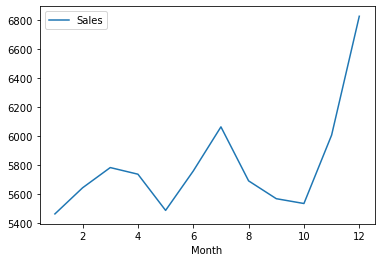

In [11]:
df_merged['Month'] = pd.DatetimeIndex(df_merged['Date']).month
groupByMonth = df_merged.groupby(by = ["Month"])
groupByMonth.mean()[['Sales']].plot.line()

<AxesSubplot:xlabel='Day'>

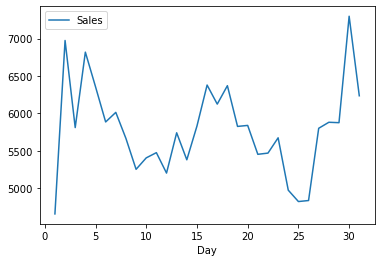

In [14]:
df_merged['Day'] = pd.DatetimeIndex(df_merged['Date']).day
groupByDay = df_merged.groupby(by = ["Day"])
groupByDay.mean()[['Sales']].plot.line()

<AxesSubplot:xlabel='Date'>

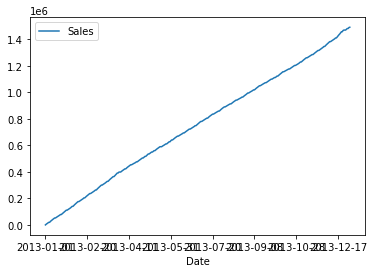

In [55]:
df_merged['Year'] = pd.DatetimeIndex(df_merged['Date']).year
firstStoreId = df_merged['Store'].min()
firstYear = df_merged['Year'].min()

cSalesFF = df_merged.loc[(df_merged['Store'] == firstStoreId) 
                         & (df_merged['Year'] == firstYear), ["Sales", "Date"]]
cSalesFF.set_index('Date', inplace = True)
cSalesFF.sort_index().cumsum().plot.line()

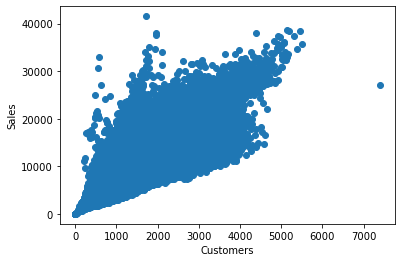

In [58]:
storeOpenData = df_train.loc[(df_train['Open'] == 1), ['Sales', 'Customers']]
customersData = storeOpenData.Customers.tolist()
salesData = storeOpenData.Sales.tolist()

plt.scatter(customersData, salesData)
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()

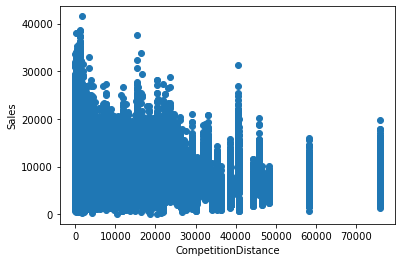

In [62]:
cDistanceSalesData = df_merged.loc[(df_merged['Sales'] != 0) & 
                            (df_merged['CompetitionDistance']), ['Sales', 'CompetitionDistance']]
cDistanceData = cDistanceSalesData.CompetitionDistance.tolist()
sales2Data = cDistanceSalesData.Sales.tolist()
plt.scatter(cDistanceData, sales2Data)
plt.xlabel("CompetitionDistance")
plt.ylabel("Sales")
plt.show()

In [12]:
pearCorr = df_merged.corr()
pearCorr.style.background_gradient()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Day
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928,0.001467,0.000023
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049,-0.005362,0.005136
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127,0.048768,-0.011612
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974,0.038179,-0.004473
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637,-0.000681,0.033428
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283,-0.011747,-0.108325
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682,0.103282,0.030538
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695,0.003578,0.000049
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326,-0.000624,-0.000006
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155,0.003916,0.000056


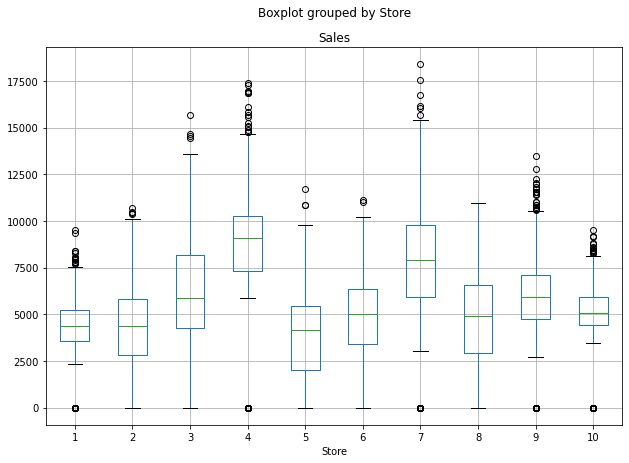

In [13]:
firstTenStoresData = df_merged.loc[(df_merged['Store'] <= 10), ['Sales', 'Store']]
firstTenStoresData.boxplot(column = 'Sales', by = 'Store', figsize=(10,7))
plt.show()

Store 4 is having highest median sales.